# softmax 回归的简洁实现

In [1]:
import torch
from torch import nn
import d2l.torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

`Sequential` 是我们之前讲的 $List$ $of$ $layer$

`nn.Flatten()` 用于将输入展平, 具体来说, 输入是 $(sample,1,28,28)$ 的张量, `nn.Flatten()` 会将第一维留下, 其他的维度全部展平, 变成 $(sample,784)$

再定义一个 `init` 函数, `apply` 函数是对所有的层应用, 类似于 $pandas$ 的 `apply`, $weight$ 是 $Linear$ 层的一个属性

In [3]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

使用交叉熵损失

`'none'` 表示直接返回 $n$ 份样本的 $loss$

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

使用随机梯度下降

In [5]:
learning_rate = 0.1
trainer = torch.optim.SGD(net.parameters(), lr=learning_rate)

调用之前定义的训练函数来训练模型

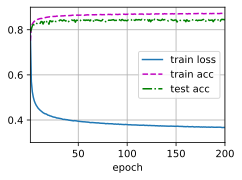

In [6]:
num_epochs = 200
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)